# Spatial skill
Demonstrate plotting functionality etc by the SpatialSkill class

In [1]:
import pandas as pd
import modelskill as ms

In [2]:
fn = '../tests/testdata/NorthSeaHD_and_windspeed.dfsu'
mr = ms.ModelResult(fn, name='HD', item=0)
fn = '../tests/testdata/altimetry_NorthSea_20171027.csv'
df = pd.read_csv(fn, index_col=0, parse_dates=True)
o1 = ms.TrackObservation(df, item=2, name='alti')
cc = ms.compare(o1, mr)

C:\Users\jem\Source\modelskill\modelskill\utils.py:139: UserWarning: Time axis has duplicate entries. Now adding milliseconds to non-unique entries to make index unique.
  warnings.warn(


In [3]:
ss = cc.spatial_skill()

In [4]:
ss

<xarray.Dataset>
Dimensions:      (y: 5, x: 5)
Coordinates:
  * y            (y) float64 50.6 51.66 52.7 53.75 54.8
  * x            (x) float64 -0.436 1.543 3.517 5.492 7.466
    observation  <U4 'alti'
Data variables:
    n            (y, x) int32 3 17 0 0 0 0 50 9 0 ... 72 33 15 28 37 83 0 20 76
    bias         (y, x) float64 -0.02626 -0.188 nan nan ... nan -0.2475 -0.1143
    rmse         (y, x) float64 0.03291 0.2105 nan nan ... nan 0.2635 0.1466
    urmse        (y, x) float64 0.01984 0.09468 nan nan ... nan 0.09066 0.09181
    mae          (y, x) float64 0.02626 0.1923 nan nan ... nan 0.2475 0.1203
    cc           (y, x) float64 0.9973 0.996 nan nan ... 0.9869 nan 0.6293 0.984
    si           (y, x) float64 0.04669 0.08355 nan nan ... nan 0.0844 0.1488
    r2           (y, x) float64 -1.061 0.9003 nan nan ... nan -18.78 0.9086

In [5]:
ss.field_names

['n', 'bias', 'rmse', 'urmse', 'mae', 'cc', 'si', 'r2']

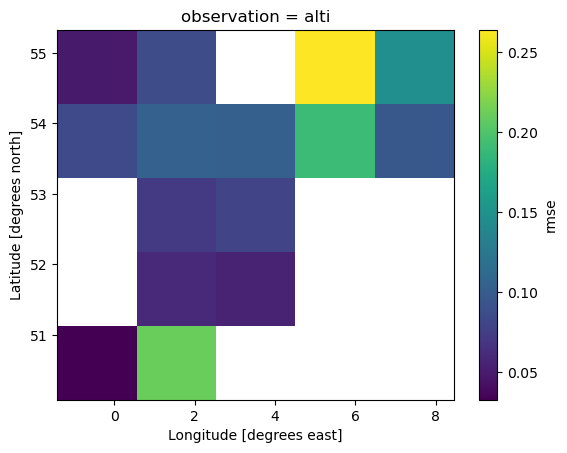

In [6]:
ss.plot('rmse');

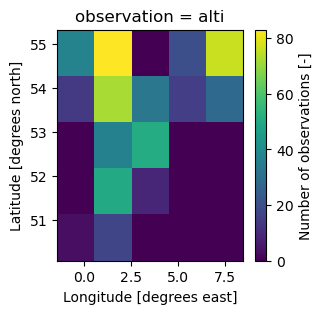

In [7]:
ss.plot('n', figsize=(3,3));

## Multi models

In [8]:
fn = "../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu"
mr1 = ms.ModelResult(fn, name="SW_1", item=0)
fn = "../tests/testdata/SW/HKZN_local_2017_DutchCoast_v2.dfsu"
mr2 = ms.ModelResult(fn, name="SW_2", item=0)

In [9]:
o1 = ms.PointObservation("../tests/testdata/SW/HKNA_Hm0.dfs0", item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = ms.PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
o3 = ms.TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")
cc = ms.compare(obs=[o1, o2, o3], mod=[mr1, mr2])

## Spatial_skill
Group by model

In [10]:
ss = cc.spatial_skill(by='model', bins=6)

In [11]:
ss.mod_names

['SW_1', 'SW_2']

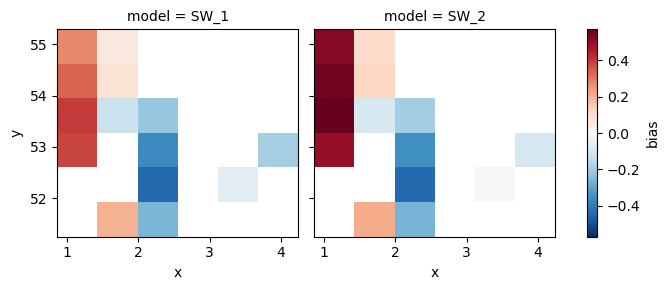

In [12]:
ss.plot("bias");

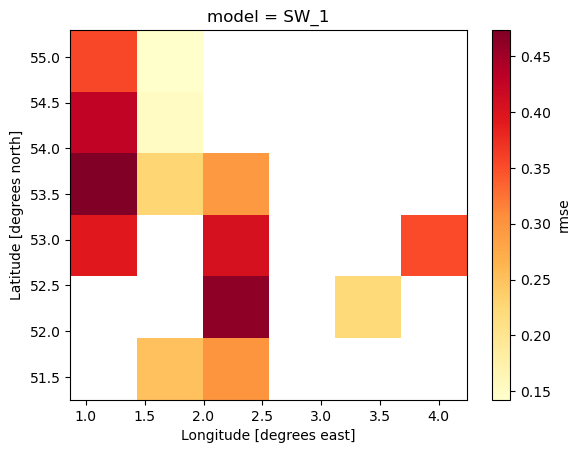

In [13]:
ss.plot("rmse", model='SW_1', cmap='YlOrRd');